# Data Pre-Processing: assignment #3 - How to preprocess numerical variables?

### Assignement Guide

In [1]:
#Assignement Guide
import Utilities as Util

file_Description_name = "AssigmentGuide.txt"
Util.read_txt(file_Description_name)

ASSIGMENT GUIDE :  Pre-Processing- How to preprocess numerical variables?
***************


Durante questa terza settimana di corso di Data Science, andremo a studiare le diverse TECNICHE DI DATA PRE-PROCESSING SU VARIABILI NUMERICHE .


In ottica di utilizzare o implementare un algoritmo di Machine Learning,


- E' necessario prima di tutto ottenere un dataset dal quale Ã¨ possiibile estrarre del valore.
- Una volta ottenuto il dataset, Ã¨ necessario capire i tipi di variabili che contengono il dataset (bisogna effettuare dei cast, eventualmente ma tipicamente Ã¨ cosi).
- Una volta che hai selezionato le variabili del tuo dataset numeriche che vuoi usare come feature per allenare un tuo modello, Ã¨ necessario (tipicamente, ma non sempre â€“ dipende dallâ€™algoritmo che si andrÃ  ad usare) a un pre-processing.


NB: Esistono diverse tecniche, chiamati SCALER, che hanno come obiettivo quello di scalare/normalizzare le variabili numeriche in un intervallo, a seconda dello Scaler applicat

## ACTIVITY 2 : Wine Quality Dataset

In [2]:
#Take a look to the dataset . Using personalize module 
file_Description_name = "Dataset/dataset_description.txt"
Util.read_txt(file_Description_name)

DESCRIPTION :
*************

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
O

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

In [4]:
#Read dataset
file_path = "Dataset/WineQT.csv"
Data = pd.read_csv(file_path)

#Read the first 5 rows of the dataset
Data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


--> Initial Dataset shape: (1143, 13)
--> Id columns as been sussifully droped ... 
--> Shape after dropped :  (1018, 12)
--> Count missing values : 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


--> Missing values visualizasion :




<AxesSubplot:>

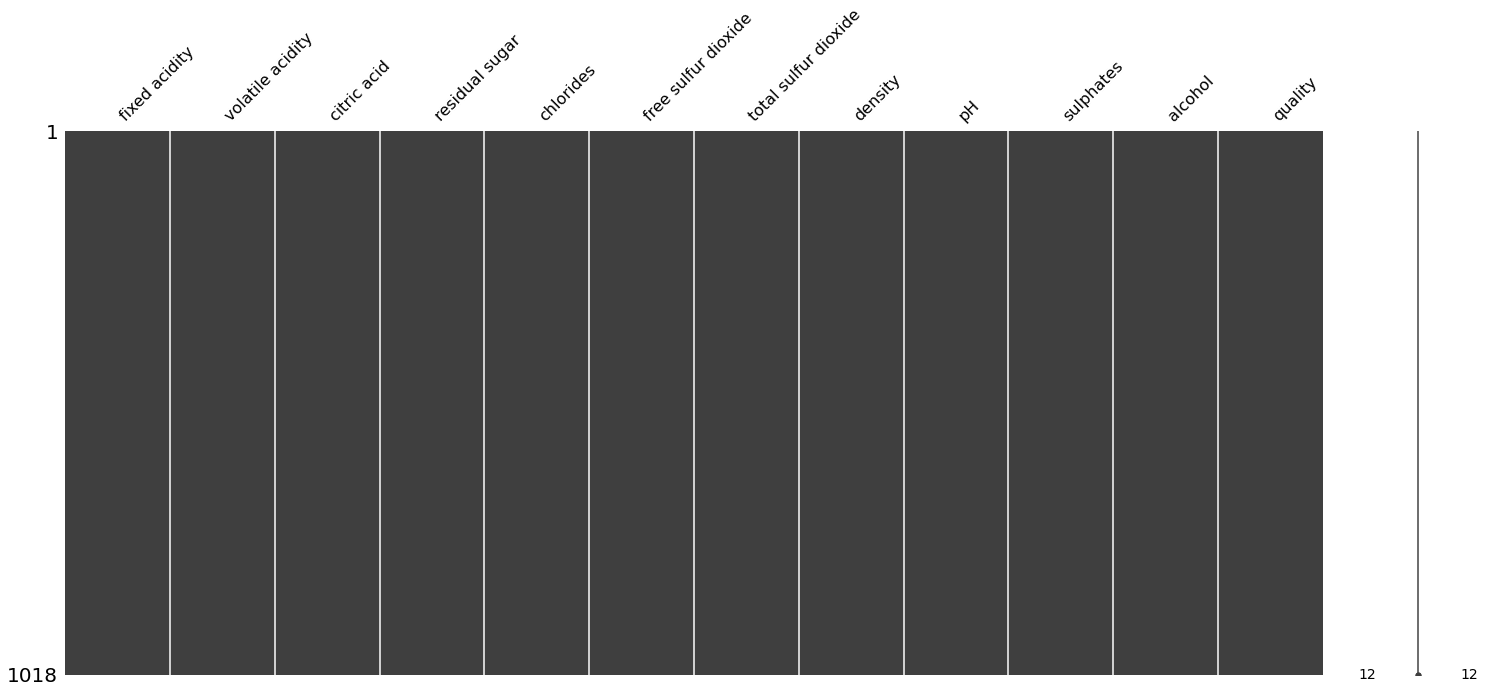

In [5]:
#Shape
print("--> Initial Dataset shape:",Data.shape)

#Drop Id columns
print("--> Id columns as been sussifully droped ... ")
Data.drop ("Id", axis=1, inplace=True) 

#Drop duplicate rows
Data = Data.drop_duplicates()
print("--> Shape after dropped : ",Data.shape)

#Count null values  
print("--> Count missing values : \n")
print(Data.isnull().sum())

#missinggno is used to visualized missing values
print("\n\n--> Missing values visualizasion :\n\n")
msno.matrix(Data)


--> Data types analisi info:


<AxesSubplot:ylabel='None'>

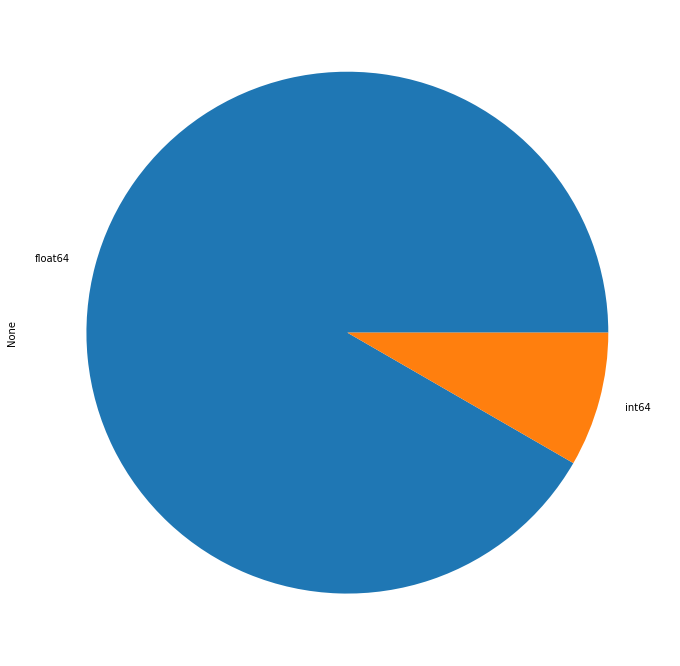

In [6]:
#Data types analisi info
print("\n--> Data types analisi info:")
Data.dtypes.value_counts().plot.pie(figsize=(15, 12))


In [7]:
#New dataset 
print("--> Dataset attualy \n")
Data_New = Data
Data_New.head(10)

--> Dataset attualy 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5
10,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,5


## Data Analisis 

In [8]:
#Describe dataset 
print("--> Dataset description : \n")
Data.describe()

--> Dataset description : 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
print("--> Mode quality :",Data["quality"].mode()[0]) 

--> Mode quality : 5



--> Correlation between values : 

 


<AxesSubplot:>

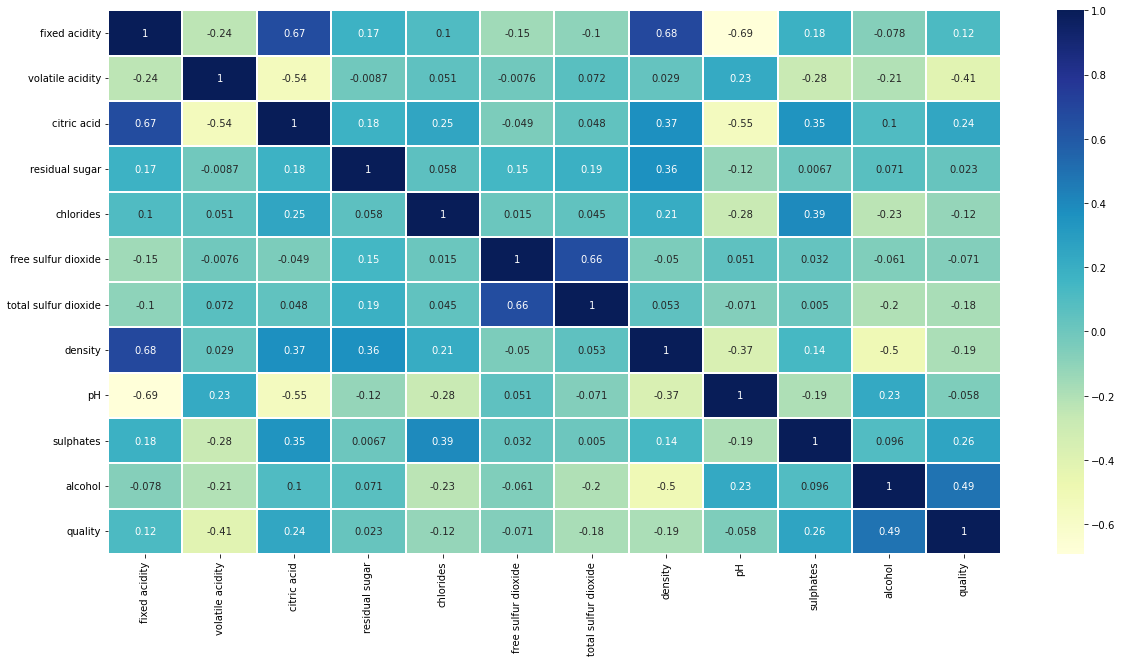

In [10]:
#Dataset values correlation
corrmat = Data.corr()

print("\n--> Correlation between values : \n\n ")

f, ax = plt.subplots(figsize =(20, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu",annot=True, linewidths = 0.1)

## Preprocessing

**Obbiettivo:**

- Provare diverse tecniche di data preprocessing sulle variabili numeriche.
- Quello che ti chiedo inoltre è di provare a scrivere il tuo codice nel miglior modo possibile che tu possa, in quanto questo è molto importante.
     - Scrivere tutto il codice all'interno di celle potrebbe non essere la soluzione ottimale in uno scenario reale.
     - Potresti creare uno script Python contenenti diversi metodi dove ciascun metodo ha un obiettivo fissato e richiamare questo script Python all'interno del notebook Jupyter che andrai a mostrarmi e ad usare come main.

In [11]:
#Our Dataset
Data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [12]:
Data.dtypes.value_counts()

float64    11
int64       1
dtype: int64

In [13]:
Data = pd.DataFrame(Data)

##Target 
y = Data['quality']
##Features
X = Data.drop(labels='quality', axis=1)

X_copy = X.copy()

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [14]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

**Obbiettivo 1** : Provare le varie techniche di Scaler e transformer

### - MinMaxScaler :

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
X = X_copy

X_minmax = MinMaxScaler().fit_transform(X)
X_minmax

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.14159292, 0.32876712, 0.08      , ..., 0.55905512, 0.1497006 ,
        0.32307692],
       [0.11504425, 0.29452055, 0.1       , ..., 0.61417323, 0.25748503,
        0.43076923],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308]])

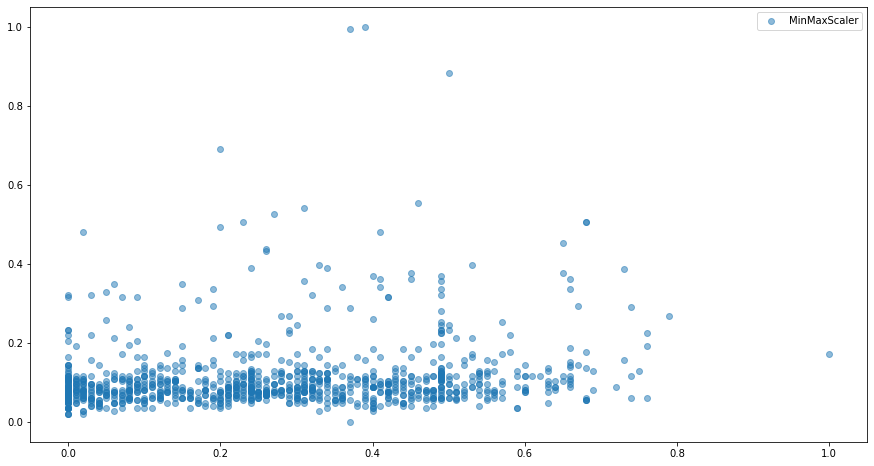

In [17]:
plt.figure(figsize=(15,8))

plt.scatter(X_minmax[:,2],X_minmax[:,3] , alpha=0.5 , label='MinMaxScaler')
plt.legend()
plt.show()

### - StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X = X_copy
X_Stdscl = StandardScaler().fit_transform(X)

X_Stdscl

array([[-0.51049878,  0.90922656, -1.37050735, ...,  1.25871871,
        -0.5781531 , -0.96156281],
       [-0.28067556,  1.89241782, -1.37050735, ..., -0.70706766,
         0.13843763, -0.59610791],
       [-0.28067556,  1.23695698, -1.16656399, ..., -0.32659287,
        -0.04071005, -0.59610791],
       ...,
       [-1.19996845,  0.36300919, -0.96262064, ...,  0.87824393,
        -0.45872131,  0.04343816],
       [-1.37233587,  0.08990051, -0.86064896, ...,  1.32213118,
         0.61616479,  0.68298422],
       [-1.37233587,  0.60880701, -0.75867729, ...,  1.6391935 ,
         0.31758532, -0.23065302]])

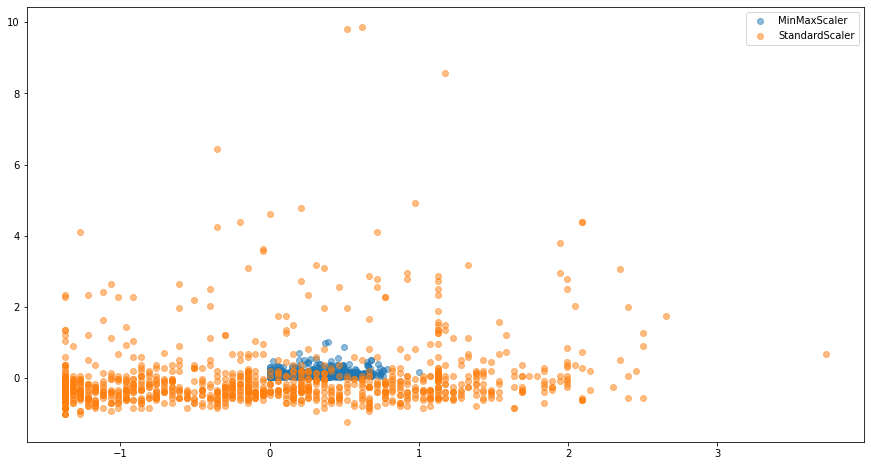

In [20]:
plt.figure(figsize=(15,8))

plt.scatter(X_minmax[:,2],X_minmax[:,3] , alpha=0.5 , label='MinMaxScaler')
plt.scatter(X_Stdscl[:,2],X_Stdscl[:,3] , alpha=0.5 , label='StandardScaler')

plt.legend()
plt.show()

#### - MaxAbsScaler

In [21]:
from sklearn.preprocessing import MaxAbsScaler

In [22]:
X = X_copy
X_maxAbsSc = MaxAbsScaler().fit_transform(X)

X_maxAbsSc

array([[0.46540881, 0.44303797, 0.        , ..., 0.87531172, 0.28      ,
        0.63087248],
       [0.49056604, 0.55696203, 0.        , ..., 0.79800499, 0.34      ,
        0.65771812],
       [0.49056604, 0.48101266, 0.04      , ..., 0.81296758, 0.325     ,
        0.65771812],
       ...,
       [0.38993711, 0.37974684, 0.08      , ..., 0.86034913, 0.29      ,
        0.70469799],
       [0.37106918, 0.34810127, 0.1       , ..., 0.87780549, 0.38      ,
        0.75167785],
       [0.37106918, 0.40822785, 0.12      , ..., 0.89027431, 0.355     ,
        0.68456376]])

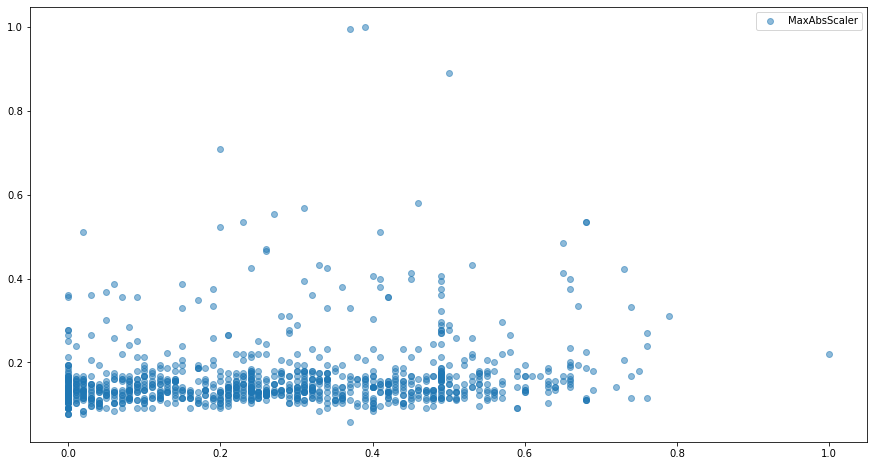

In [23]:
plt.figure(figsize=(15,8))

plt.scatter(X_maxAbsSc[:,2],X_maxAbsSc[:,3] , alpha=0.5 , label='MaxAbsScaler')

plt.legend()
plt.show()

### - Robuscaler 

**NB:** Recommended to handler dataset wiht outlier 

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
X = X_copy

X_robust = RobustScaler().fit_transform(X)

X_robust

array([[-0.25      ,  0.70588235, -0.75757576, ...,  1.05263158,
        -0.35294118, -0.47058824],
       [-0.05      ,  1.41176471, -0.75757576, ..., -0.57894737,
         0.35294118, -0.23529412],
       [-0.05      ,  0.94117647, -0.63636364, ..., -0.26315789,
         0.17647059, -0.23529412],
       ...,
       [-0.85      ,  0.31372549, -0.51515152, ...,  0.73684211,
        -0.23529412,  0.17647059],
       [-1.        ,  0.11764706, -0.45454545, ...,  1.10526316,
         0.82352941,  0.58823529],
       [-1.        ,  0.49019608, -0.39393939, ...,  1.36842105,
         0.52941176,  0.        ]])

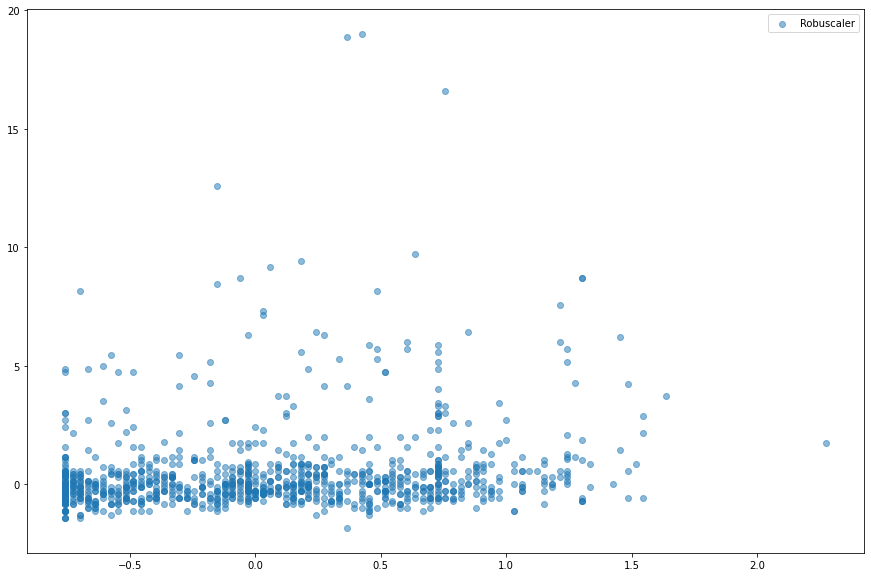

In [26]:
plt.figure(figsize=(15,10))

plt.scatter(X_robust[:,2],X_robust[:,3] , alpha=0.5 , label='Robuscaler')
plt.legend()
plt.show()


### Resume

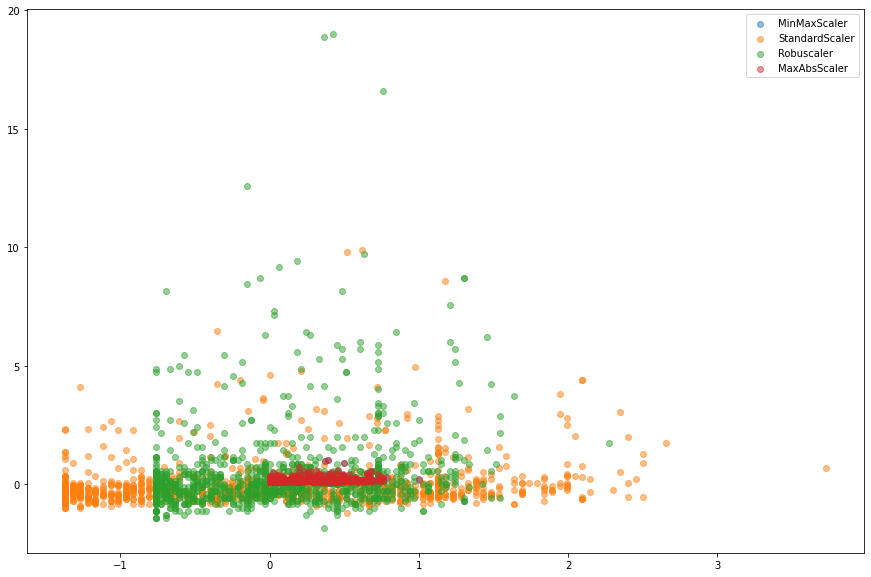

In [27]:
plt.figure(figsize=(15,10))

plt.scatter(X_minmax[:,2],X_minmax[:,3] , alpha=0.5 , label='MinMaxScaler')
plt.scatter(X_Stdscl[:,2],X_Stdscl[:,3] , alpha=0.5 , label='StandardScaler')
plt.scatter(X_robust[:,2],X_robust[:,3] , alpha=0.5 , label='Robuscaler')
plt.scatter(X_maxAbsSc[:,2],X_maxAbsSc[:,3] , alpha=0.5 , label='MaxAbsScaler')


plt.legend()
plt.show()

## Transformers

### - PolynomialFeatures

**USE CASE :** Use LinearRegression model with plynomiaLFeatures features

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [29]:
X_Poly = PolynomialFeatures(3).fit_transform(X)  ## Plolinomio di terzo gradi
X_Poly

array([[1.000000e+00, 7.400000e+00, 7.000000e-01, ..., 2.947840e+00,
        4.948160e+01, 8.305840e+02],
       [1.000000e+00, 7.800000e+00, 8.800000e-01, ..., 4.531520e+00,
        6.530720e+01, 9.411920e+02],
       [1.000000e+00, 7.800000e+00, 7.600000e-01, ..., 4.140500e+00,
        6.242600e+01, 9.411920e+02],
       ...,
       [1.000000e+00, 6.200000e+00, 6.000000e-01, ..., 3.532200e+00,
        6.394500e+01, 1.157625e+03],
       [1.000000e+00, 5.900000e+00, 5.500000e-01, ..., 6.469120e+00,
        9.533440e+01, 1.404928e+03],
       [1.000000e+00, 5.900000e+00, 6.450000e-01, ..., 5.141820e+00,
        7.386840e+01, 1.061208e+03]])

In [35]:
X.shape

(1018, 11)

In [37]:
y.shape
y = y.values.reshape(-1,1)

In [43]:
X = X_copy

plt.figure(figsize=(10,5))
#plt.scatter(X,y)

X_Poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_Poly,y)
y_pred = model.predict(X_Poly)
plt.scatter(y_pred , c='r',lw=3 )
plt.scatter(y , c='b', lw=3 )

#plt.scatter(y_pred,y , c='r',lw=3 )

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 720x360 with 0 Axes>